In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import ParameterGrid
from torch.utils.data import DataLoader
from vae.datasets_randomized import VolSurfaceDataSetRand, CustomBatchSampler
from vae.cvae_with_mem_randomized import CVAEMemRand
from vae.utils import *
from eval_scripts.eval_single_day import *
import os, sys
from typing import Dict

In [2]:
set_seeds(0)
torch.set_default_dtype(torch.float64)
num_epochs = 500
ctx_len = 4
start_day = 4950
days_to_generate = 100
num_vaes = 1000

In [3]:
data = np.load("data/vol_surface_with_ret.npz")
vol_surf_data = data["surface"]
ret_data = data["ret"]
level_data = data["levels"]
skew_data = data["skews"]
slope_data = data["slopes"]
ex_data = np.concatenate([ret_data[...,np.newaxis], skew_data[...,np.newaxis], slope_data[...,np.newaxis]], axis=-1)
print(ex_data.shape)
train_dataset = VolSurfaceDataSetRand(vol_surf_data[:4000])
valid_dataset = VolSurfaceDataSetRand(vol_surf_data[4000:5000])
test_dataset = VolSurfaceDataSetRand(vol_surf_data[5000:])
train_batch_sampler = CustomBatchSampler(train_dataset, 64)
valid_batch_sampler = CustomBatchSampler(valid_dataset, 16)
test_batch_sampler = CustomBatchSampler(test_dataset, 16)
train_simple = DataLoader(train_dataset, batch_sampler=train_batch_sampler)
valid_simple = DataLoader(valid_dataset, batch_sampler=valid_batch_sampler)
test_simple = DataLoader(test_dataset, batch_sampler=test_batch_sampler)

train_dataset2 = VolSurfaceDataSetRand((vol_surf_data[:4000], ex_data[:4000]))
valid_dataset2 = VolSurfaceDataSetRand((vol_surf_data[4000:5000], ex_data[4000:5000]))
test_dataset2 = VolSurfaceDataSetRand((vol_surf_data[5000:], ex_data[5000:]))
train_batch_sampler2 = CustomBatchSampler(train_dataset2, 64)
valid_batch_sampler2 = CustomBatchSampler(valid_dataset2, 16)
test_batch_sampler2 = CustomBatchSampler(test_dataset2, 16)
train_ex = DataLoader(train_dataset2, batch_sampler=train_batch_sampler2)
valid_ex = DataLoader(valid_dataset2, batch_sampler=valid_batch_sampler2)
test_ex = DataLoader(test_dataset2, batch_sampler=test_batch_sampler2)

(5822, 3)


# 1 feat (ret)

In [4]:
ex_data = ret_data[...,np.newaxis]
print(ex_data.shape)

(5822, 1)


In [5]:
model_data = torch.load("test_spx/ex_rand_compress_context_ret/conv_mem_spx_ex_rand_compress_context_0.pt") # latent_dim=5, surface_hidden=[5,5,5], mem_hidden=100
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(126, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=5, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=5, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[ 0.5272,  1.4389,  0.2155,  0.1215, -0.1385],
         [-0.9919, -0.6410,  1.2079,  0.4209, -1.0779],
         [-0.3768, -1.3549,  0.4378,  0.3954,  0.3877],
         [-0.0146,  1.3205, -0.0903,  1.2394,  0.2507]]])


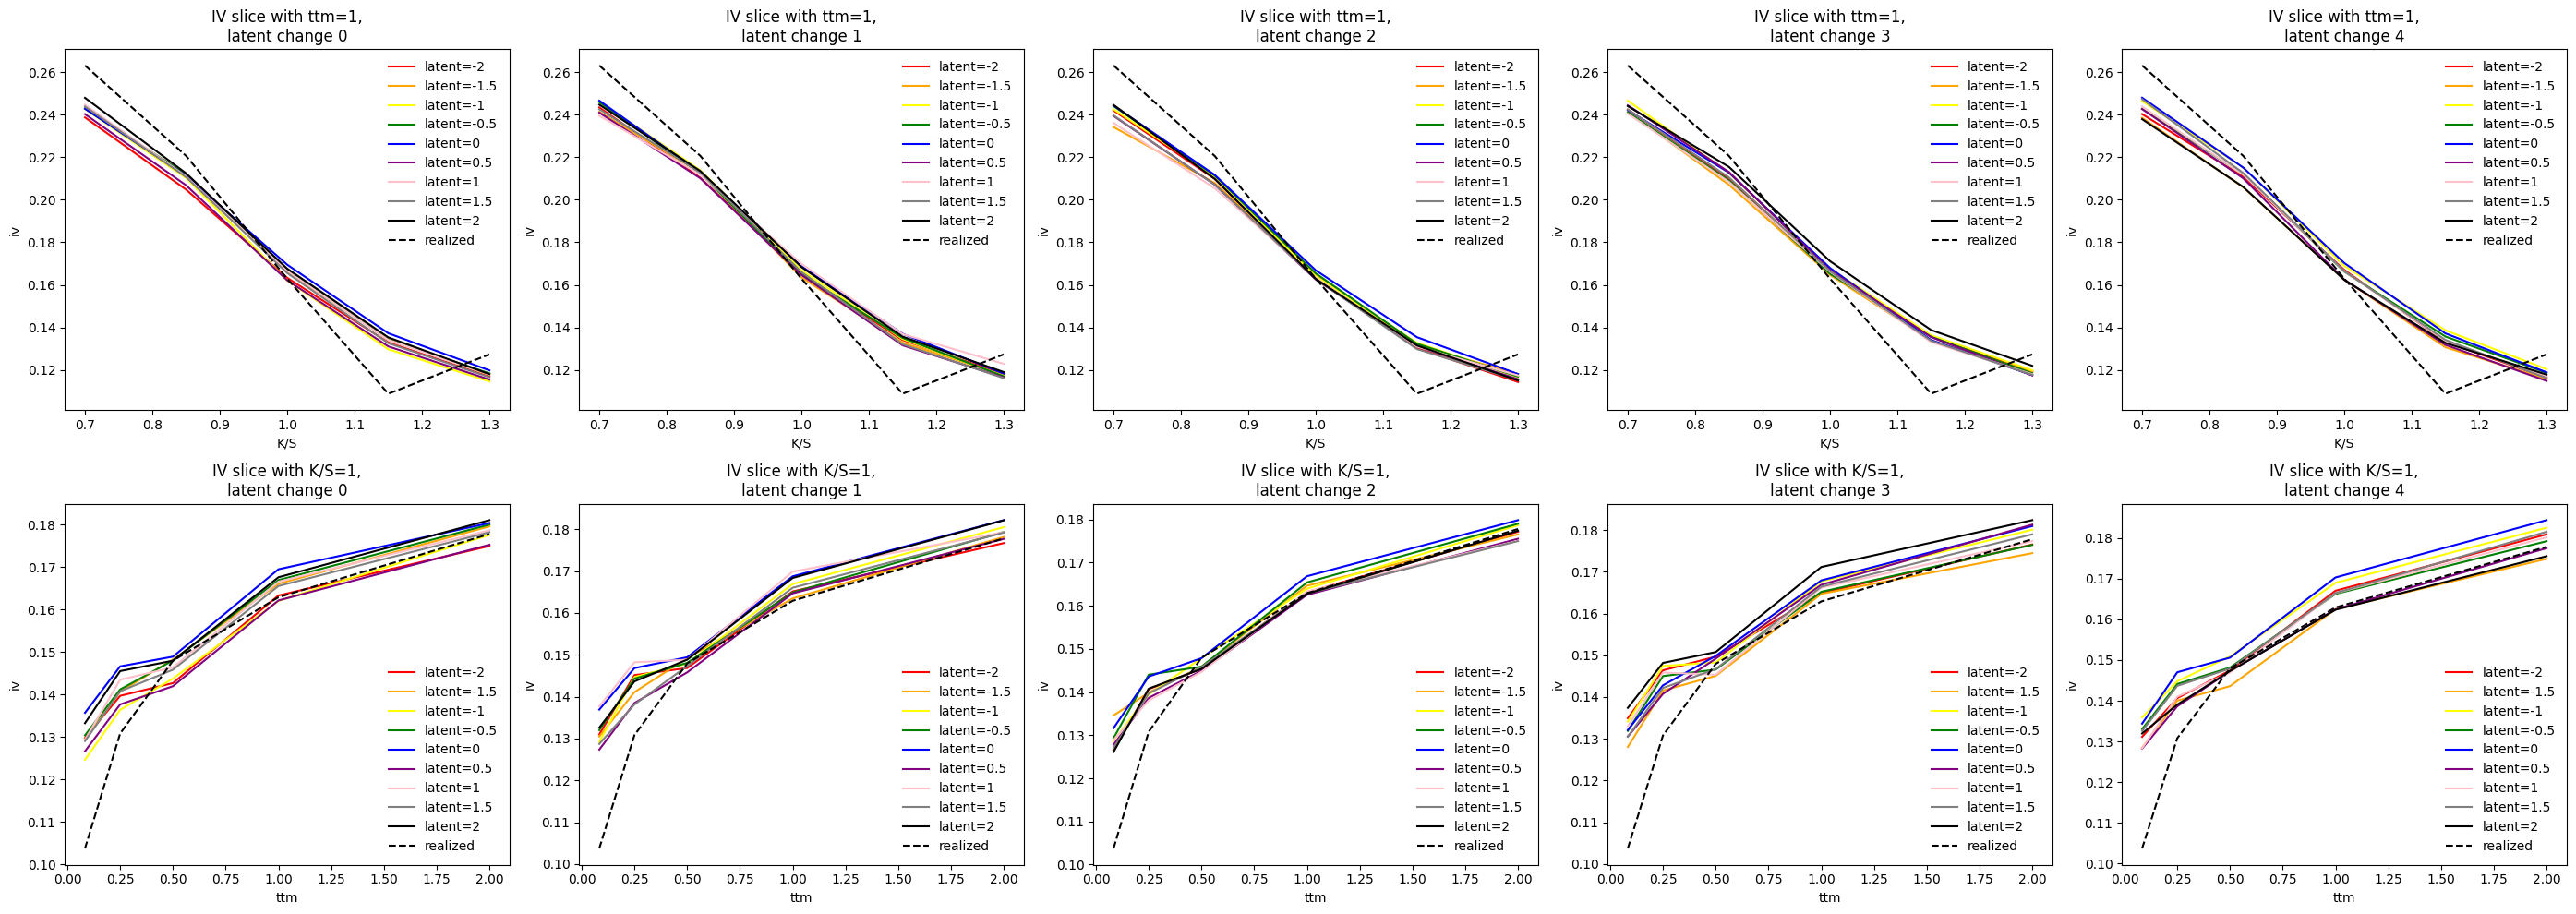

In [6]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
# plot_ret_different_latents(outputs, z_value_range)

In [7]:
model_data = torch.load("test_spx/ex_rand_compress_context_ret/conv_mem_spx_ex_rand_compress_context_1.pt") # latent_dim=5, surface_hidden=[5,5,5], mem_hidden=100
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(126, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=5, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=5, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[-0.0050, -0.8107, -0.3690,  0.5215, -0.4785],
         [-0.5014, -0.2814, -1.4494, -1.6290,  1.0330],
         [ 0.5162,  2.1263,  0.1862, -1.0401, -0.5180],
         [ 0.2581,  1.0314, -0.2099,  0.6195, -1.9188]]])


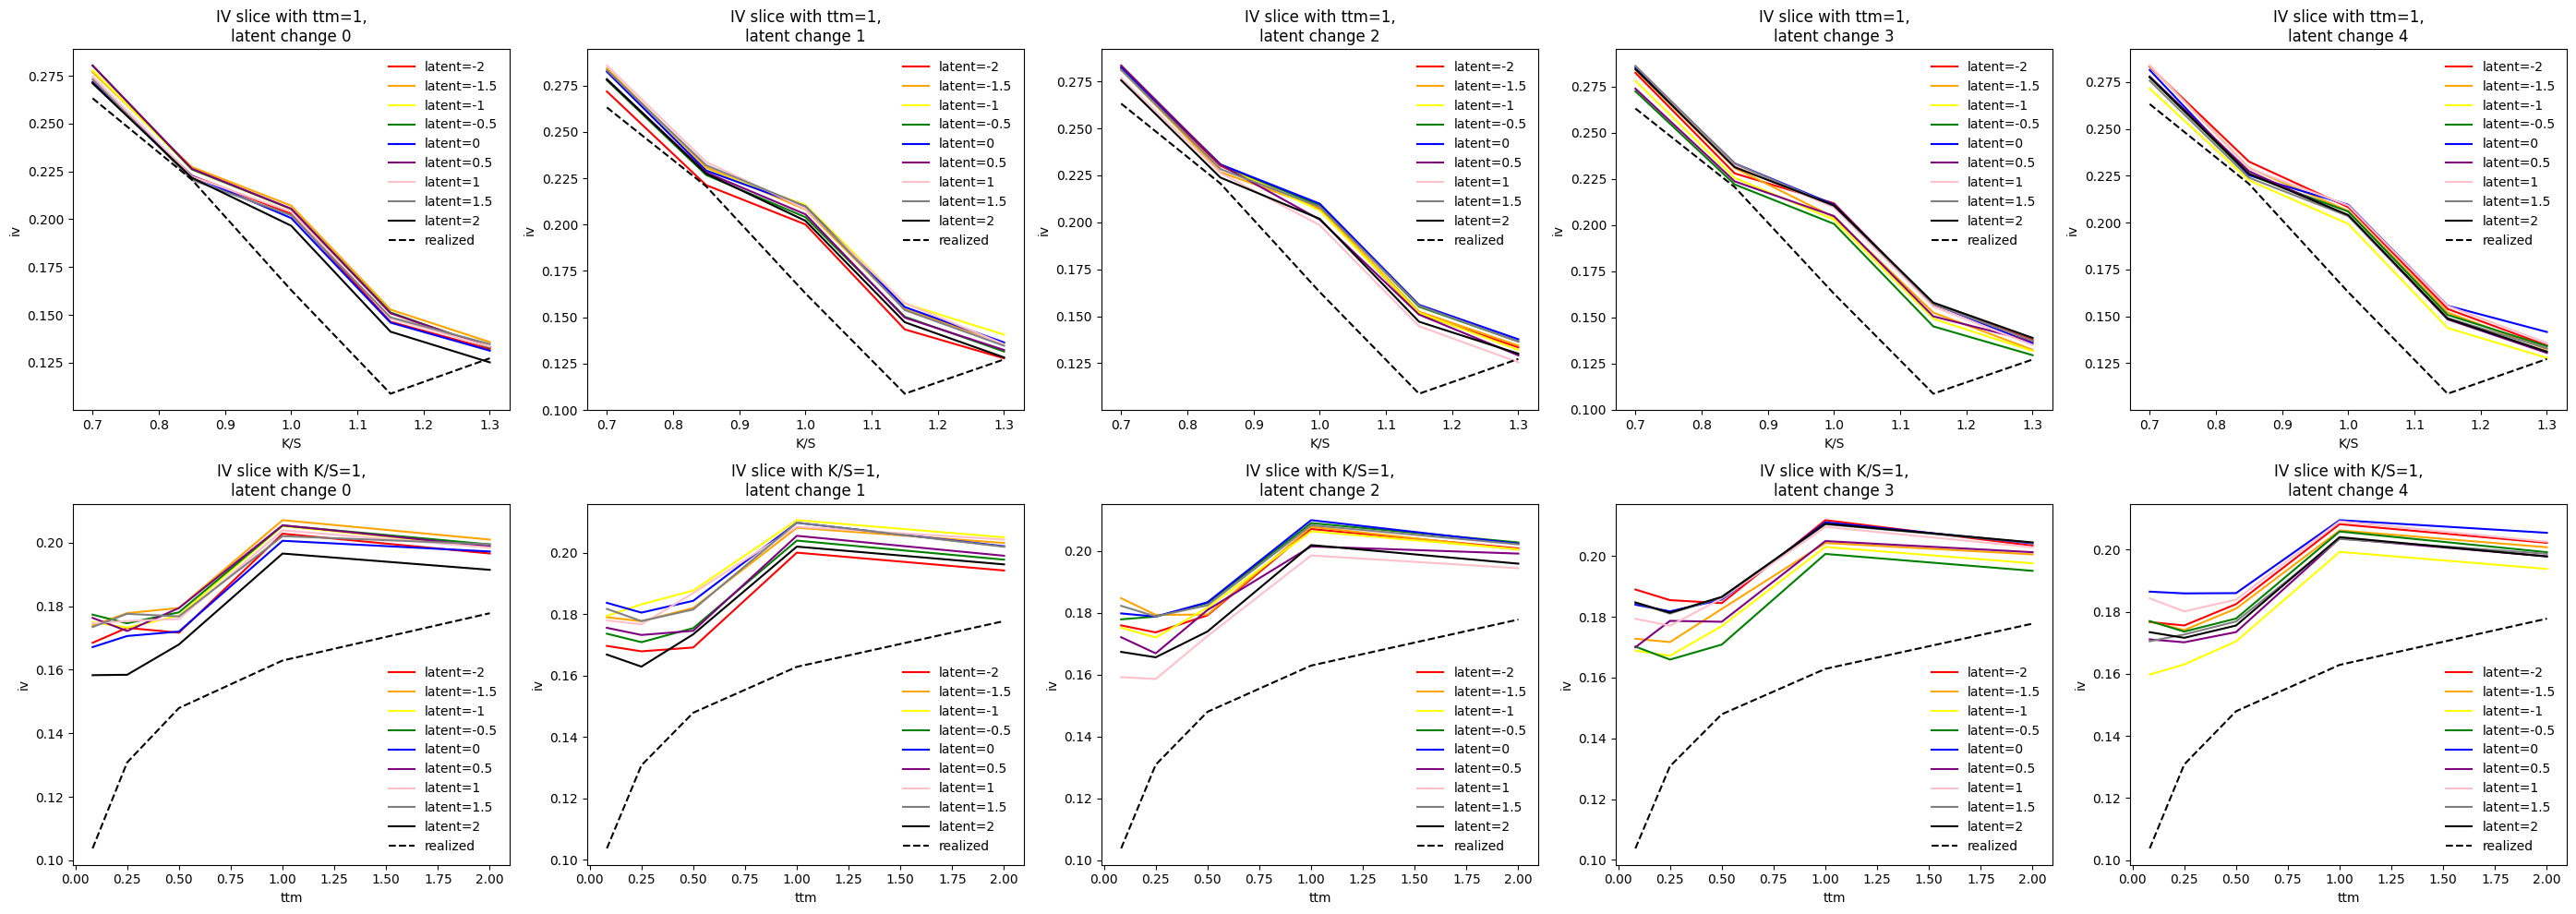

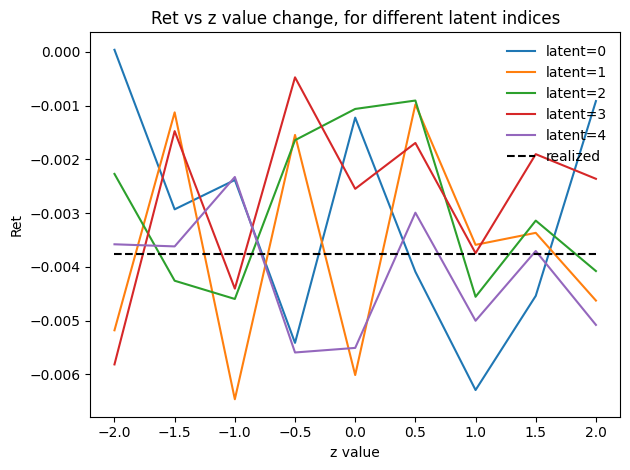

In [8]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
plot_ret_different_latents(outputs, ex_data[5001, 0], z_value_range)

# 3 feats (ret, skew, slope)

In [4]:
ex_data = np.concatenate([ret_data[...,np.newaxis], skew_data[...,np.newaxis], slope_data[...,np.newaxis]], axis=-1)
print(ex_data.shape)

(5822, 3)


In [5]:
model_data = torch.load("test_spx/ex_3_feats/conv_mem_spx_ex3_0.pt") # latent_dim=5, surface_hidden=[5,5,5], mem_hidden=100
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(128, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=5, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=5, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[-1.8023, -0.9564,  0.2486,  1.2973,  0.5221],
         [-0.2829, -0.6011, -0.5221, -1.4176,  0.9912],
         [ 1.5119,  1.2021,  0.3716, -0.9744,  0.8522],
         [ 0.3088, -1.1714,  0.2890,  0.2064,  0.8517]]])


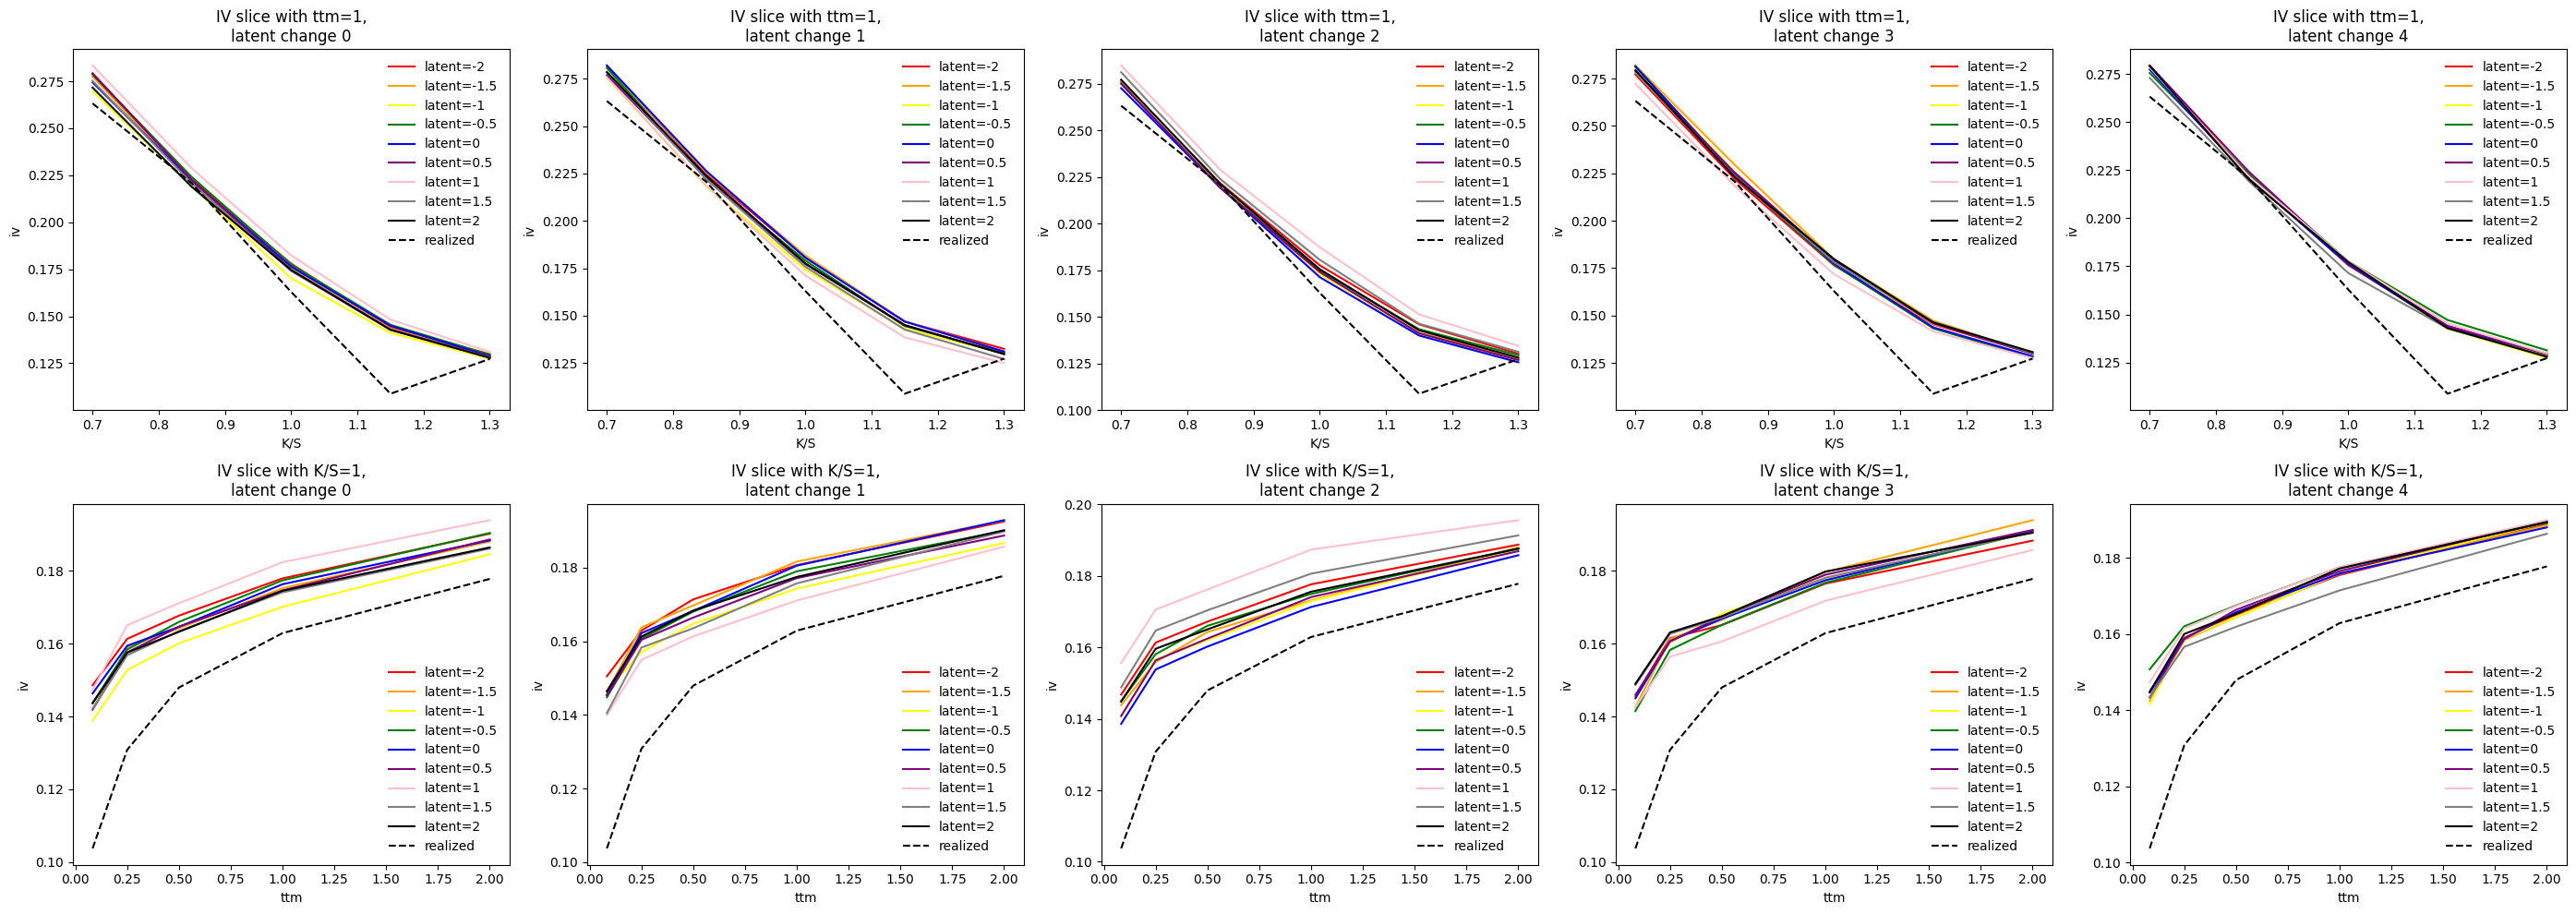

In [6]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
# plot_ret_different_latents(outputs, z_value_range)

In [7]:
model_data = torch.load("test_spx/ex_3_feats/conv_mem_spx_ex3_1.pt") # latent_dim=5, surface_hidden=[5,5,5], mem_hidden=100
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(128, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=5, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=5, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[ 0.7954,  0.5440,  0.3606, -2.0972,  0.4116],
         [ 0.7749,  0.2739, -0.0288,  0.6439,  0.8956],
         [ 0.5305, -0.8368,  0.6372,  0.1477, -0.8139],
         [-1.4473,  0.9175, -0.5113,  0.5013,  1.7043]]])


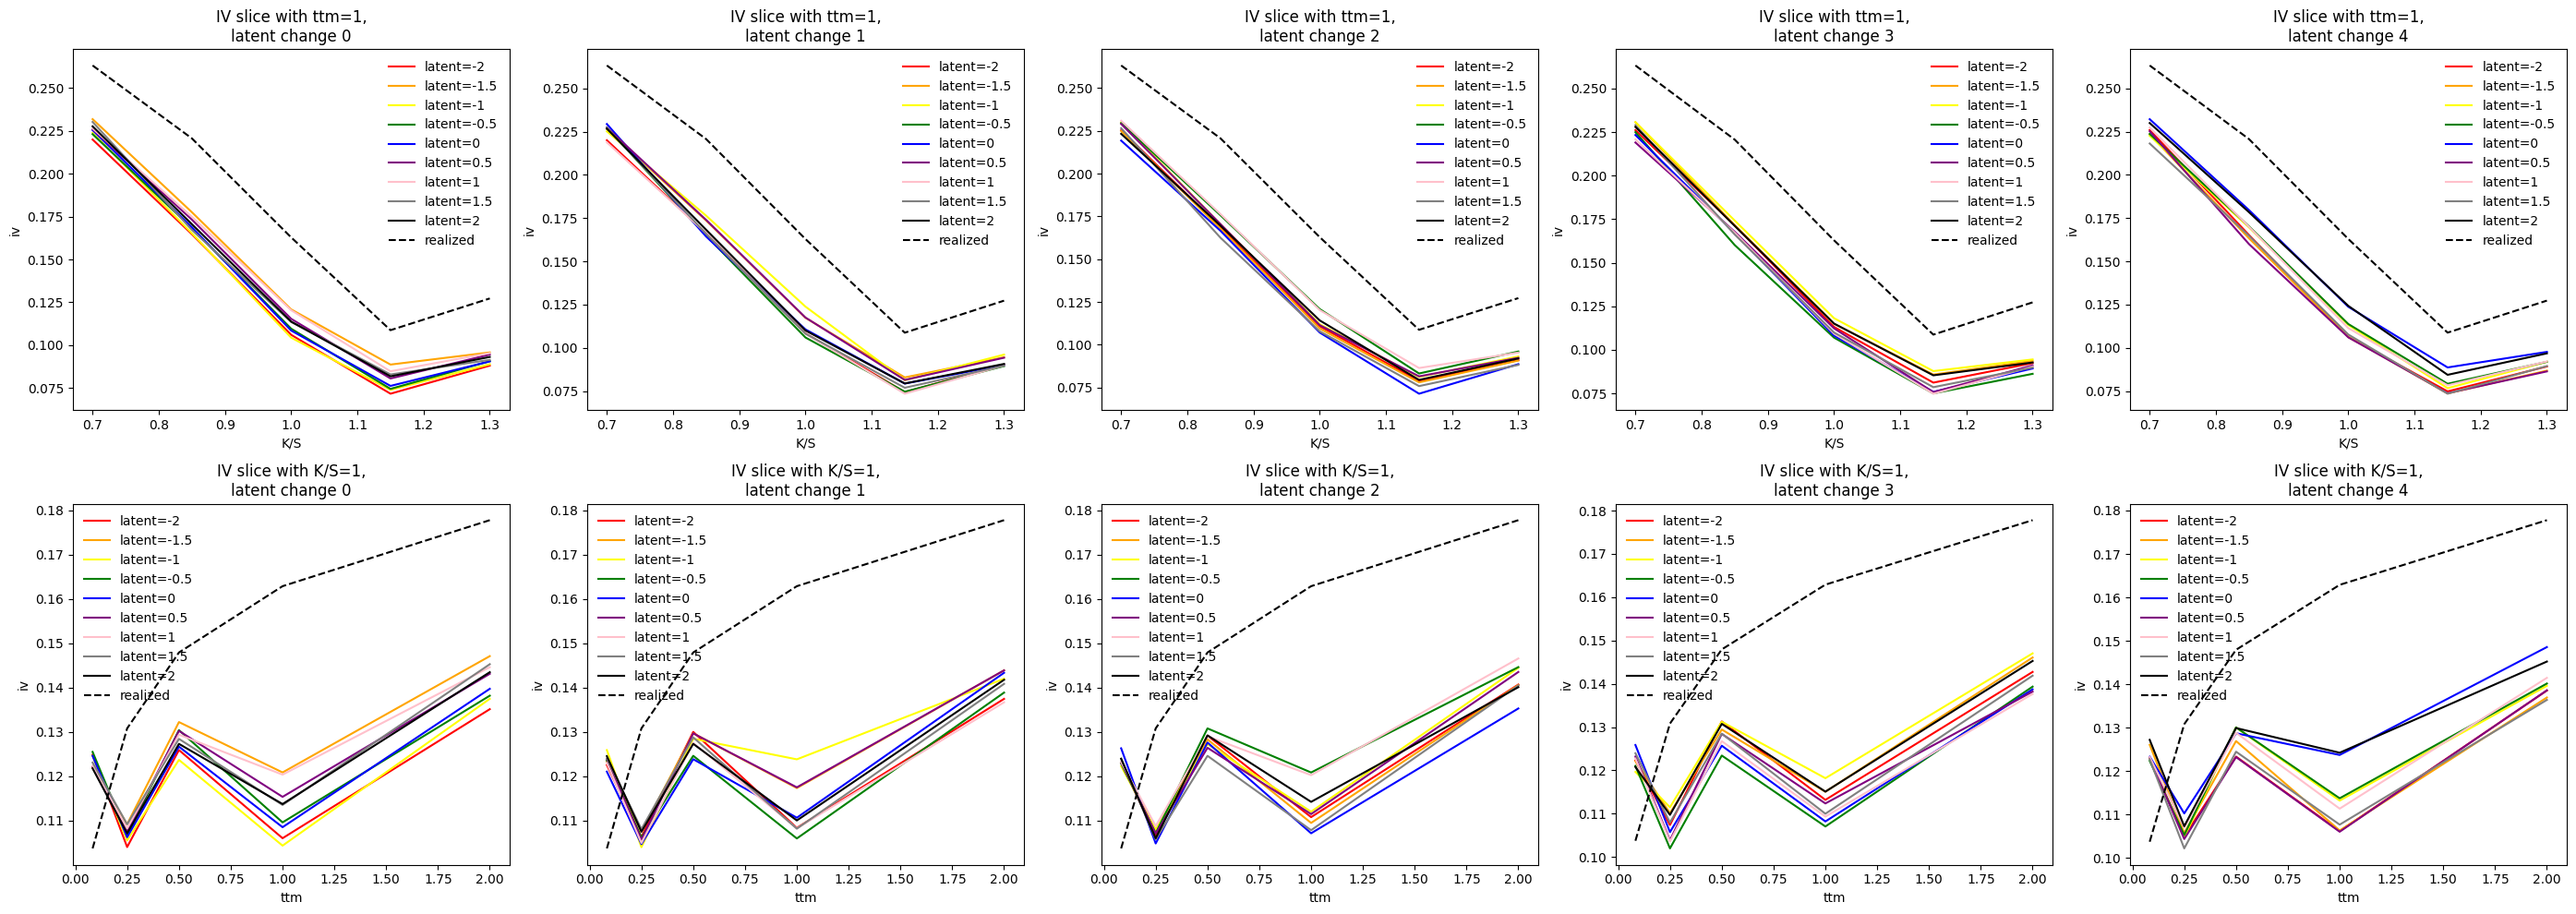

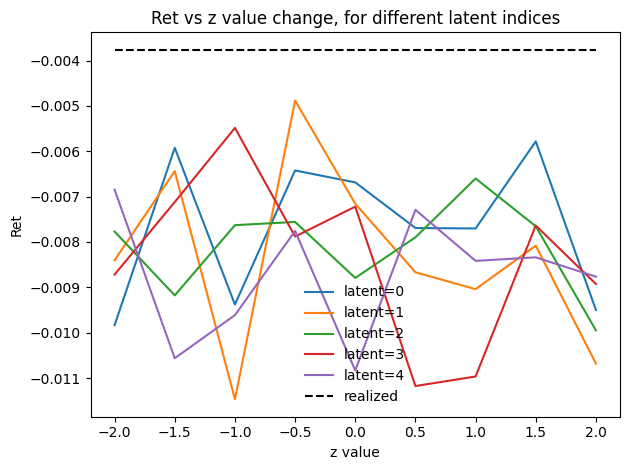

In [8]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
plot_ret_different_latents(outputs, ex_data[5001, 0], z_value_range)

In [9]:
model_data = torch.load("test_spx/ex3_lr/model_0.pt") # latent_dim=5, surface_hidden=[5,5,5], mem_hidden=100, loss on ret only
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(128, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=5, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=5, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[-2.0172e-03, -8.2054e-01,  1.4165e+00, -7.5490e-01,  5.5492e-01],
         [-2.2510e+00, -7.0327e-01, -1.0016e-01, -8.2117e-02,  1.5489e+00],
         [-1.5185e+00, -1.4286e+00, -6.0569e-01,  9.8646e-01,  3.3659e-01],
         [-1.7688e+00,  1.2978e+00,  9.8675e-01,  1.1249e+00,  1.0735e+00]]])


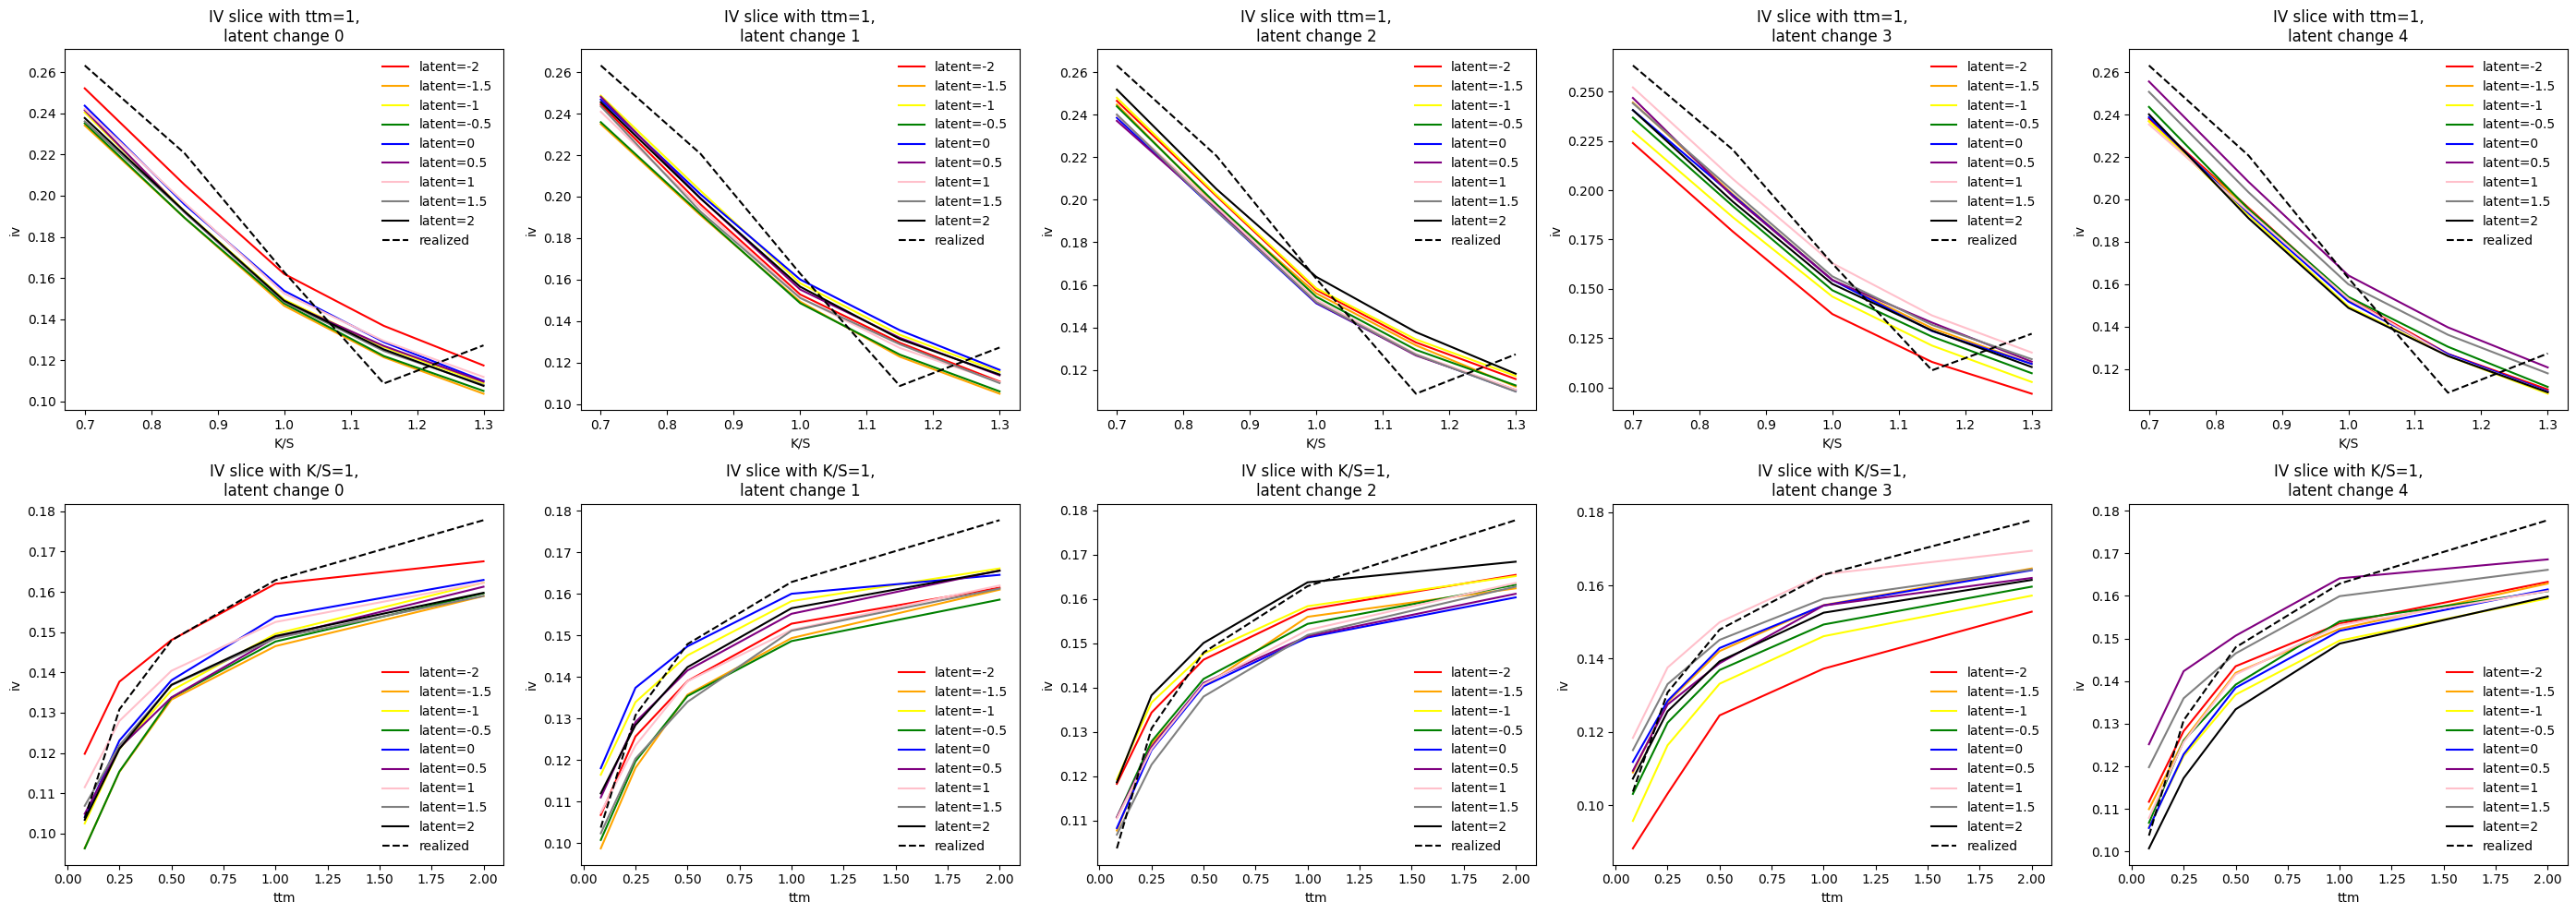

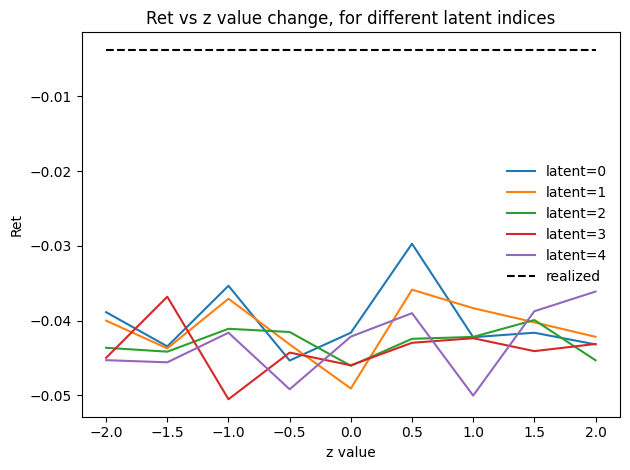

In [10]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
plot_ret_different_latents(outputs, ex_data[5001, 0], z_value_range)

In [11]:
model_data = torch.load("test_spx/ex3_lr/model_1.pt") # latent_dim=8, surface_hidden=[5,5,5], mem_hidden=100, loss on ret only
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(128, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=8, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=8, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[-1.5976,  0.1703, -1.6982, -1.9821,  0.7987, -0.7691, -2.1295,
           0.2907],
         [-1.3534,  0.5182, -0.1499, -0.3948,  0.8319,  1.8408,  1.0671,
           0.2880],
         [ 1.0309,  0.8762,  0.2226, -0.6145, -0.0977, -1.2657, -0.9827,
           1.1509],
         [-1.5188,  2.4765,  0.2797,  0.3738,  0.1234, -0.7597,  0.3276,
           0.0427]]])


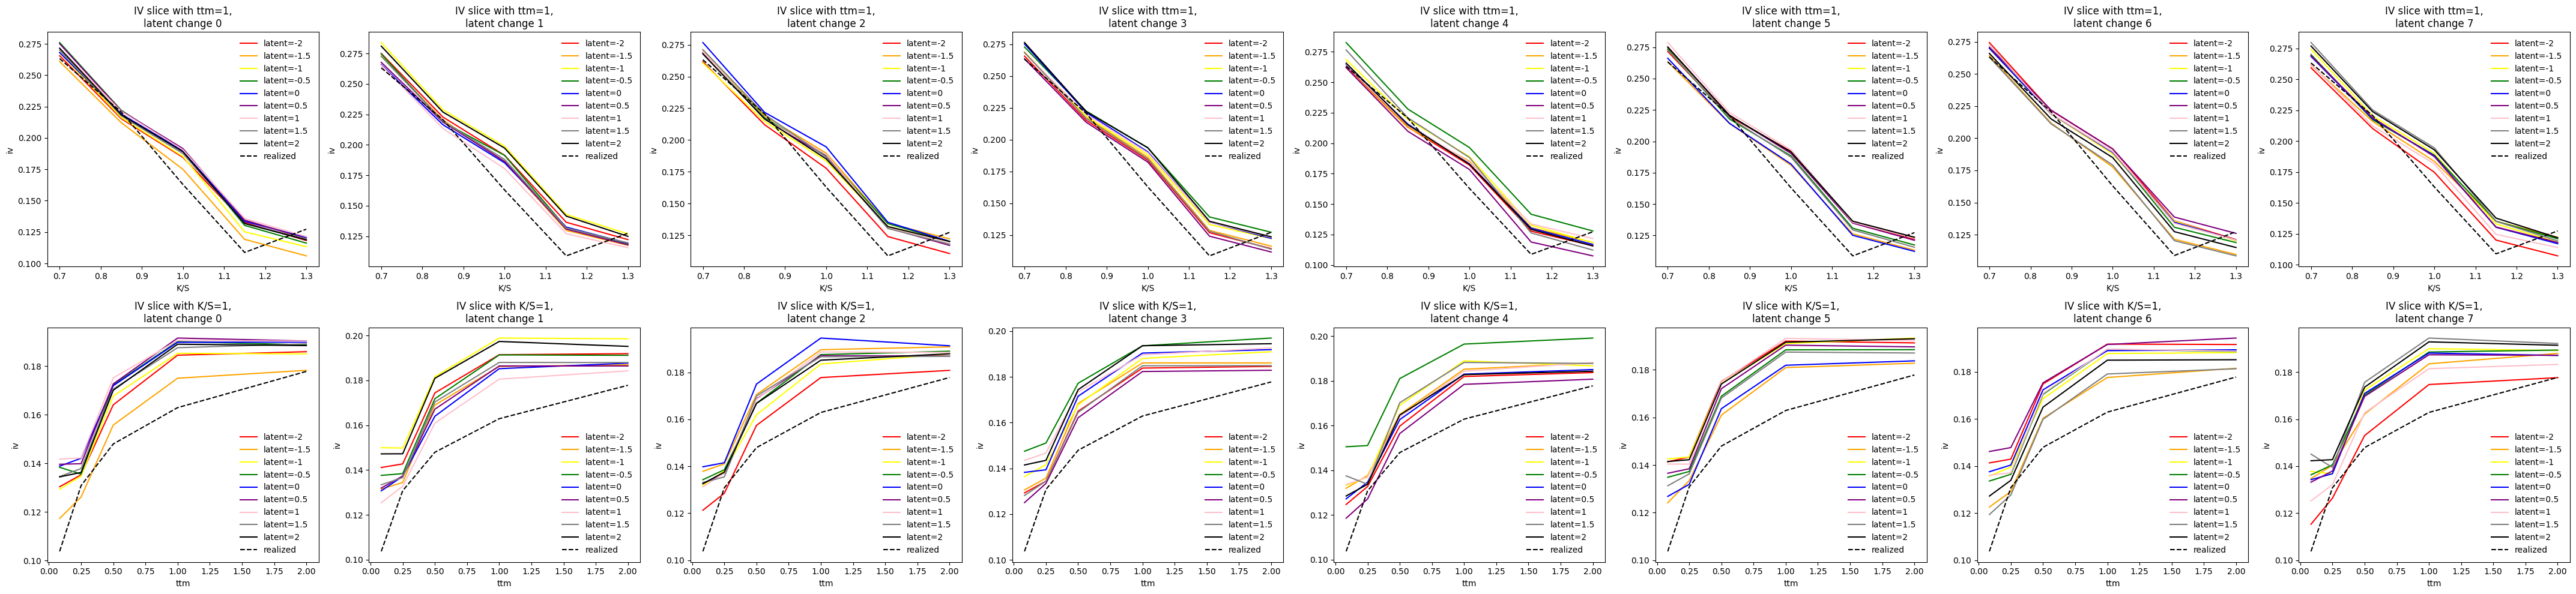

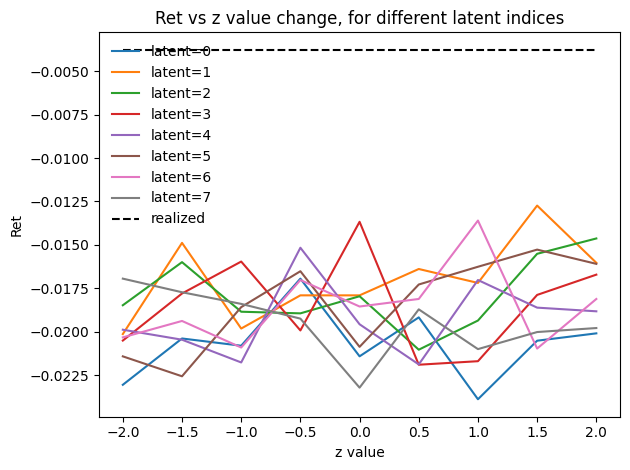

In [12]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
plot_ret_different_latents(outputs, ex_data[5001, 0], z_value_range)

In [13]:
model_data = torch.load("test_spx/ex3_l2/model_l2_0.pt") # latent_dim=5, surface_hidden=[5,5,5], mem_hidden=100, loss on ret only
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(128, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=5, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=5, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[-0.0635, -1.0245,  0.6159,  0.4512, -0.8618],
         [-2.1457, -1.1096, -1.4599, -1.2731, -1.7845],
         [-0.2289,  0.4798,  1.7559,  0.2458,  1.0664],
         [ 1.0513, -0.0707, -0.2061, -0.1561,  0.6088]]])


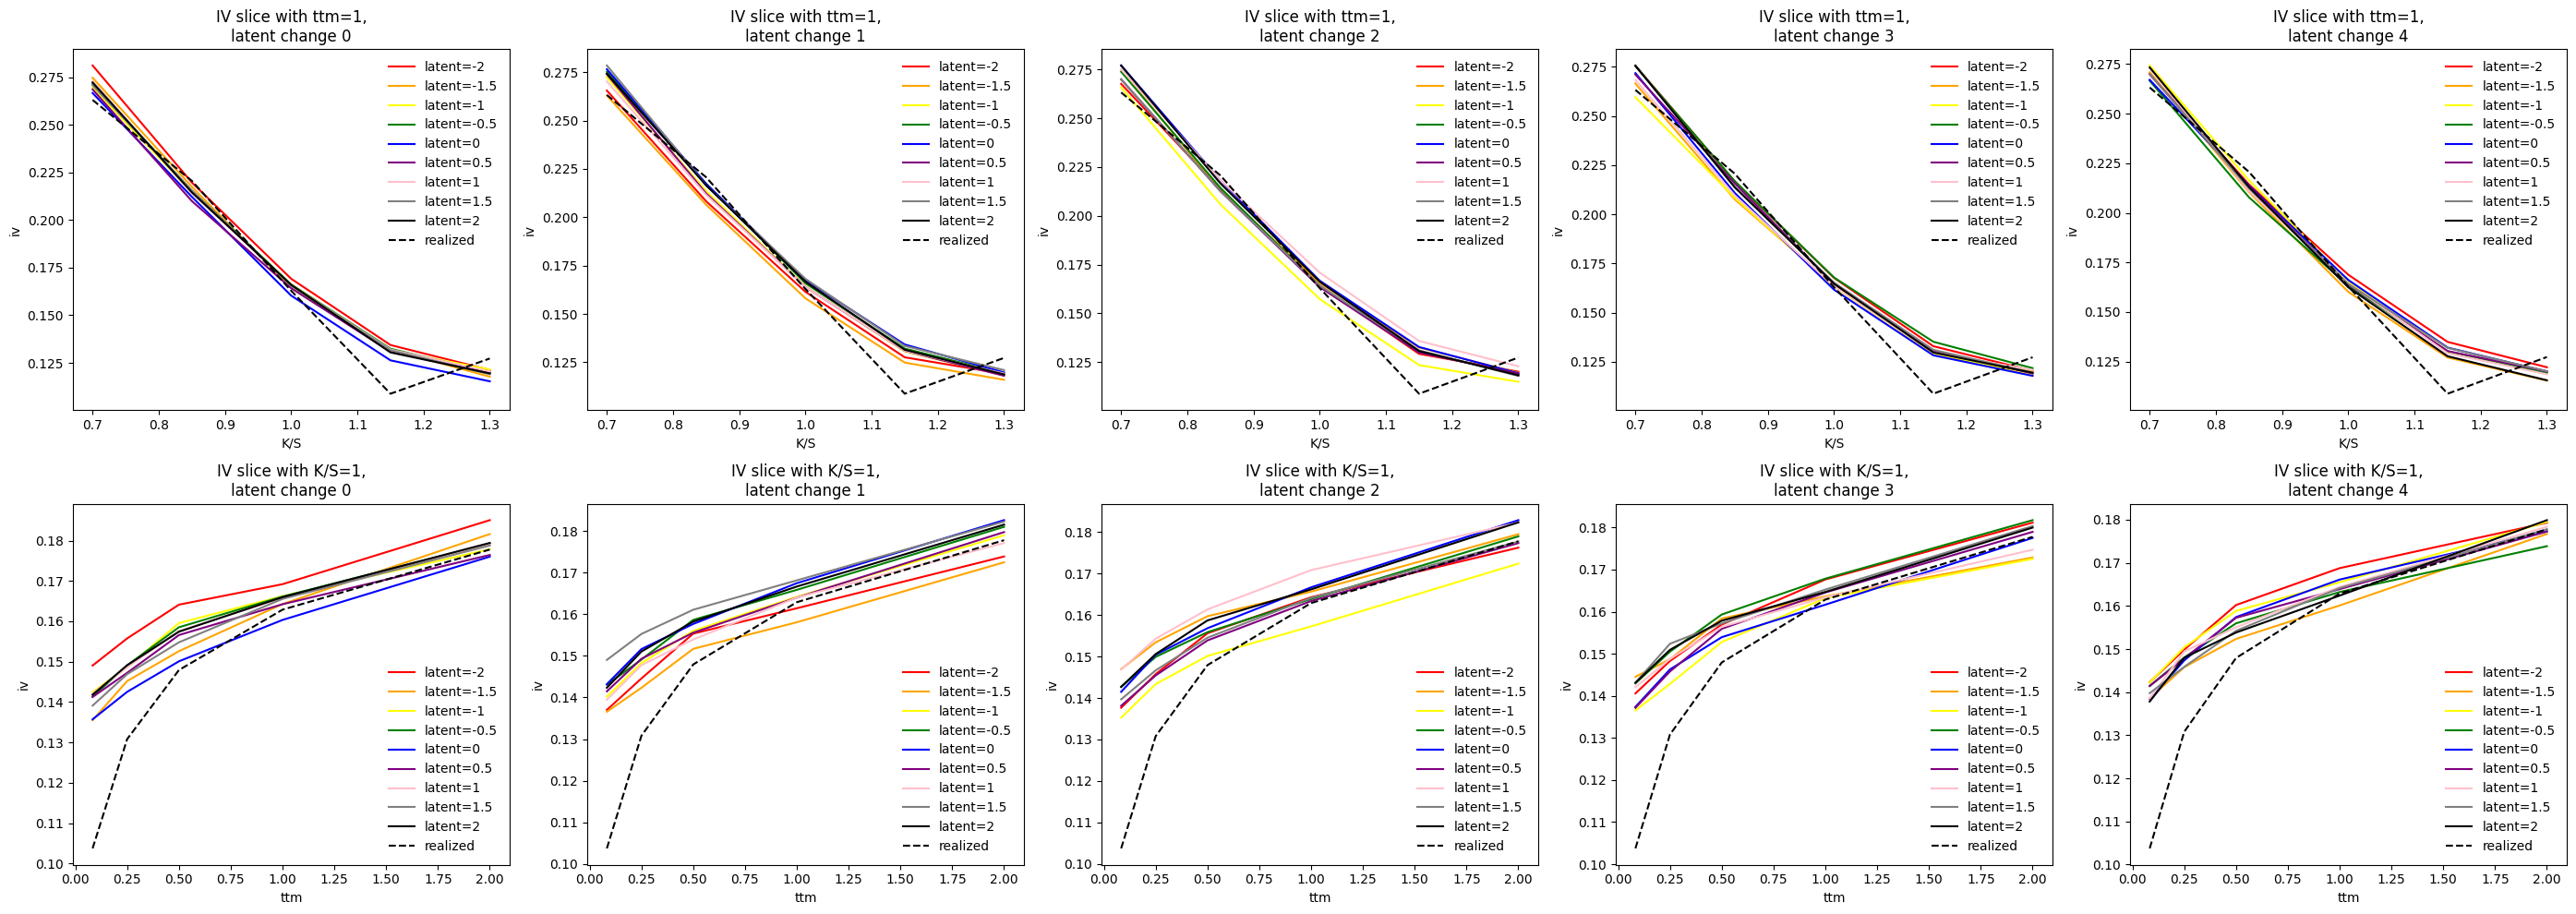

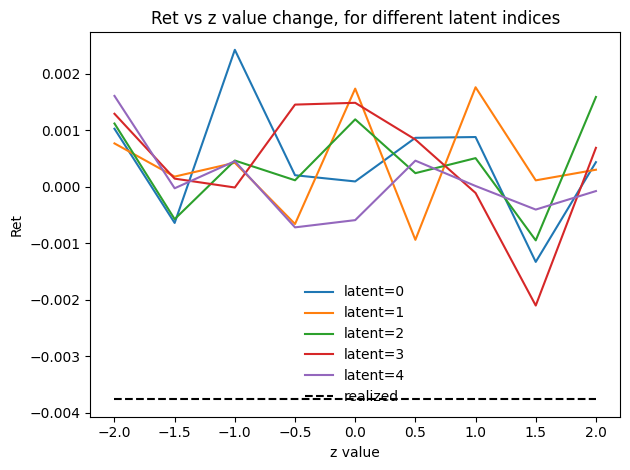

In [14]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
plot_ret_different_latents(outputs, ex_data[5001, 0], z_value_range)

# 4 feats (ret, level, skew, slope)

In [18]:
ex_data = np.concatenate([ret_data[...,np.newaxis], level_data[...,np.newaxis], skew_data[...,np.newaxis], slope_data[...,np.newaxis]], axis=-1)
print(ex_data.shape)

(5822, 4)


In [19]:
model_data = torch.load("test_spx/ex_4_feats/conv_mem_spx_ex4_2.pt") # latent_dim=8, surface_hidden=[5,5,5], mem_hidden=100
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(129, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=8, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=8, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[-0.6808, -0.0942,  1.1422,  0.9534, -0.4140, -0.3914, -0.8243,
          -1.7118],
         [-1.0069, -0.3999, -1.2200, -2.5226,  0.2486, -0.7526, -1.0230,
           1.2211],
         [-0.9162, -0.8217, -1.2938, -0.3153,  0.7979, -1.5070,  1.3645,
           0.7043],
         [-1.3367, -0.6933,  0.3572,  0.0954, -0.5491,  0.3376, -0.9858,
           2.8426]]])


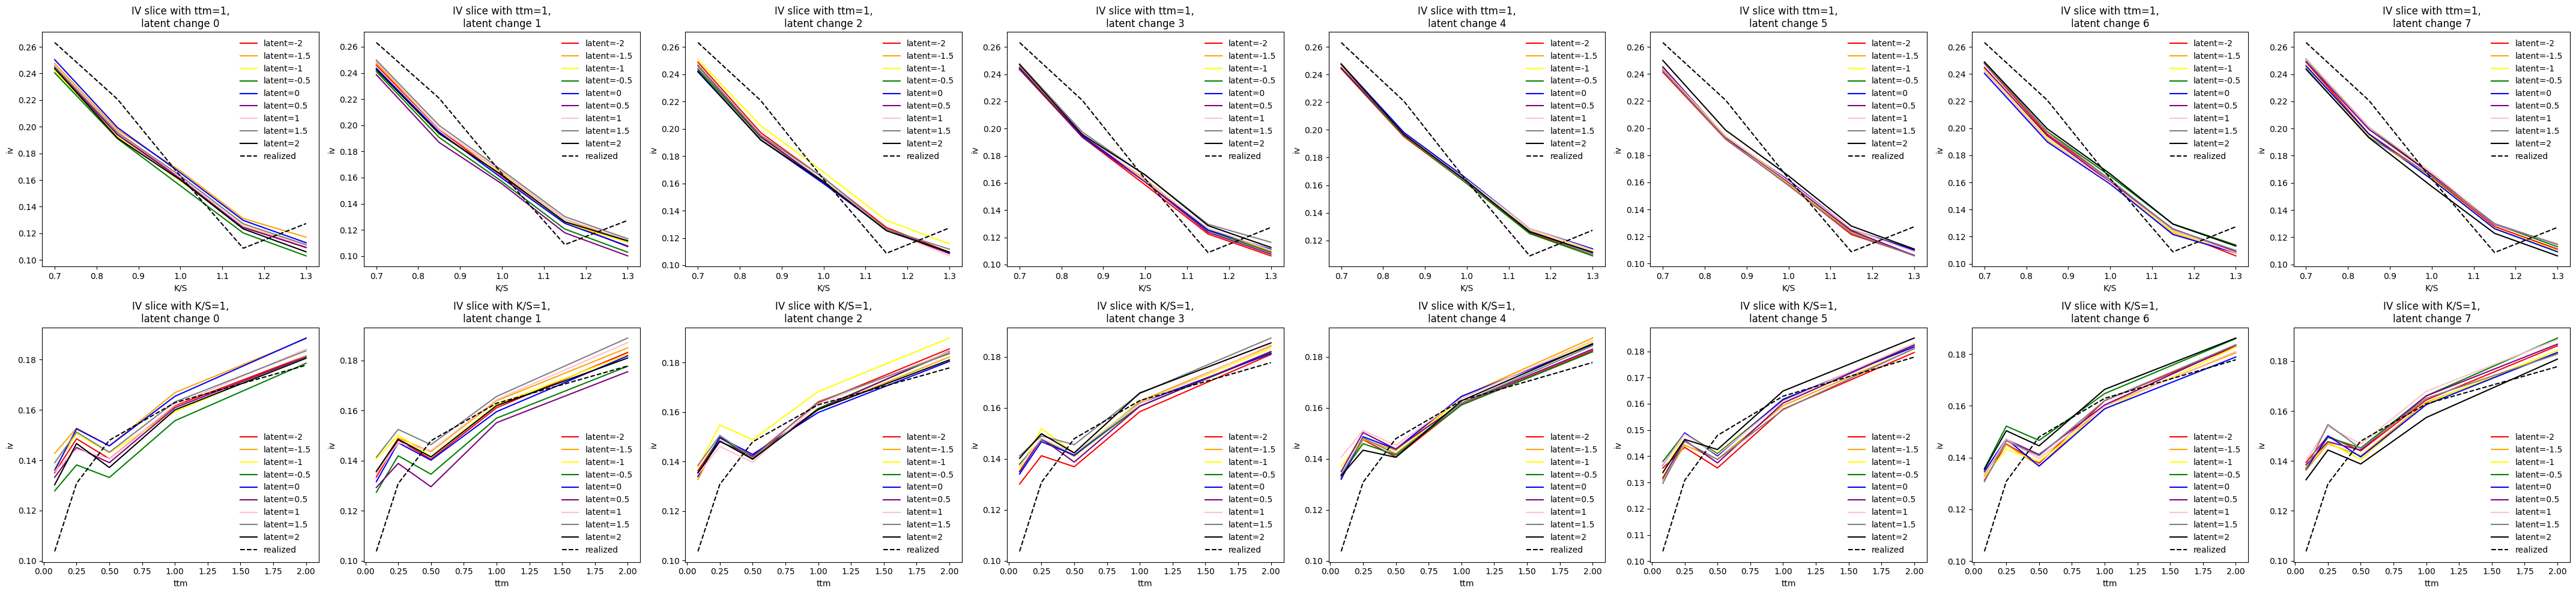

In [20]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
# plot_ret_different_latents(outputs, z_value_range)

In [28]:
model_data = torch.load("test_spx/ex_4_feats/conv_mem_spx_ex4_3.pt") # latent_dim=8, surface_hidden=[5,5,5], mem_hidden=100
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(129, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=8, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=8, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[-0.6037, -1.8617,  0.9761,  0.7905,  0.7132, -0.8389, -1.5947,
          -1.8109],
         [ 0.0372, -0.6824, -1.0974, -1.1146, -1.0509,  1.4989, -1.0553,
           0.7255],
         [ 0.6943, -0.4114, -1.0729,  0.8721,  0.7373, -1.5534, -0.3037,
           0.7247],
         [ 0.0806, -0.6054,  0.0746,  0.9167, -0.8005, -0.5705,  0.1180,
          -0.9386]]])


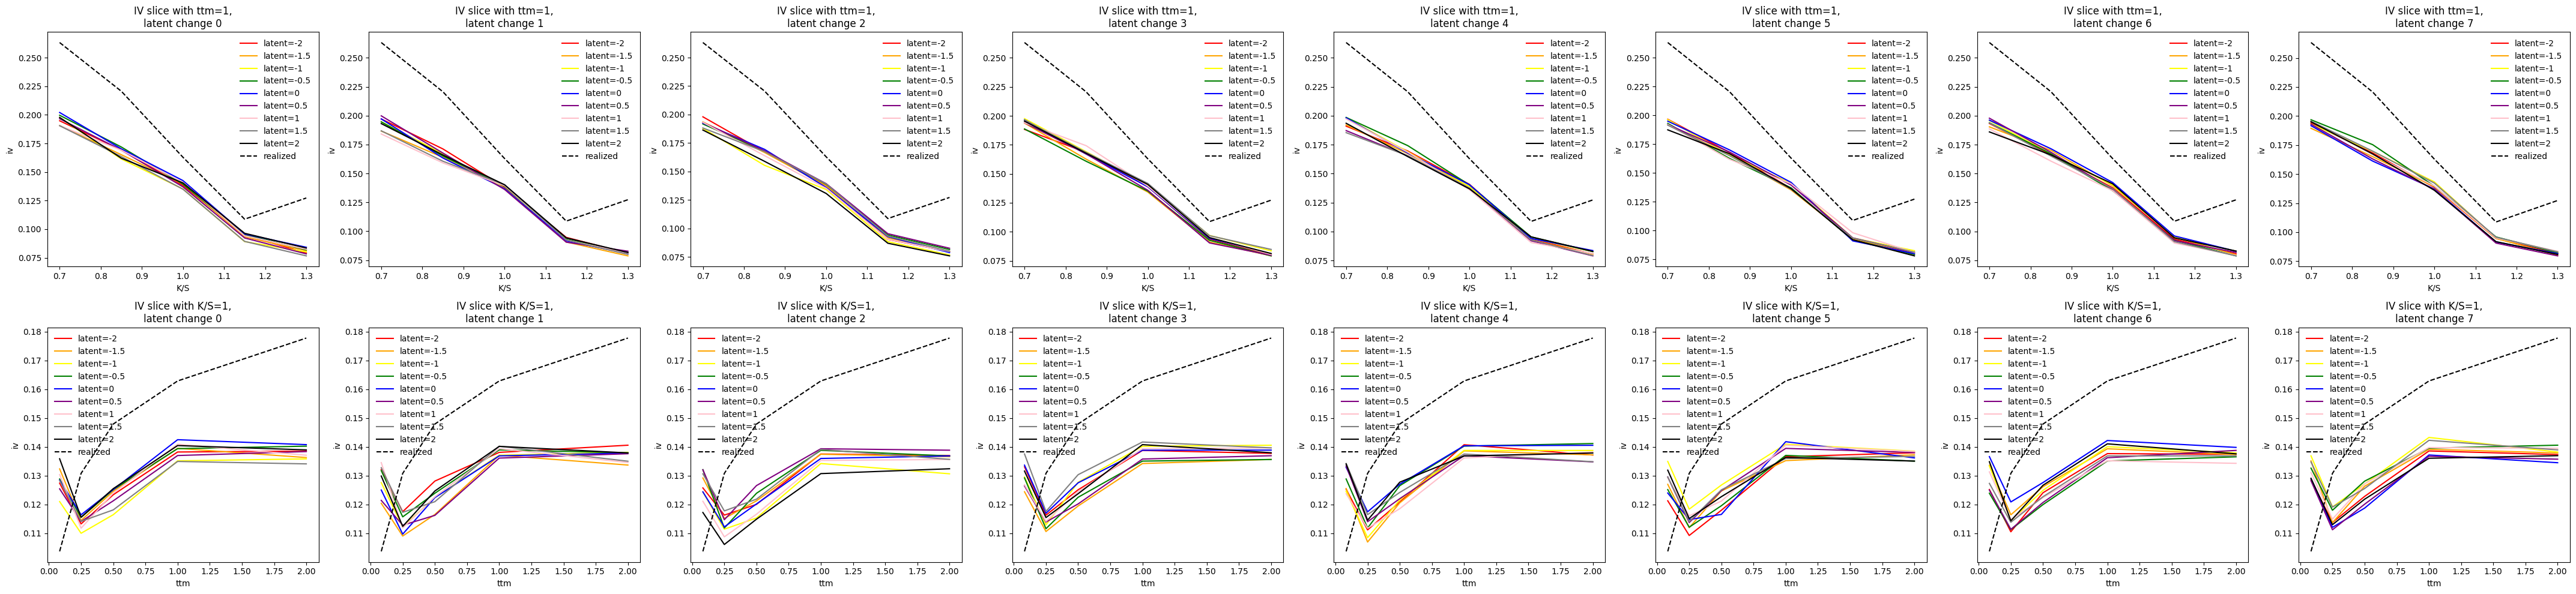

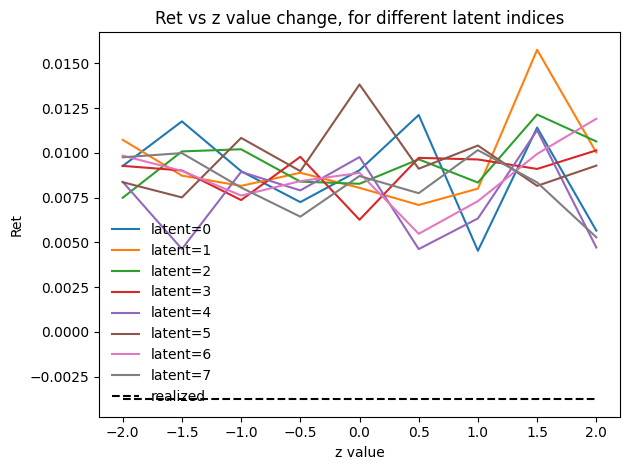

In [29]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
plot_ret_different_latents(outputs, ex_data[5001, 0], z_value_range)

In [23]:
model_data = torch.load("test_spx/ex4_lr/model_0.pt") # latent_dim=5, surface_hidden=[5,5,5], mem_hidden=100, loss on ret only
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(129, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=5, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=5, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[-0.2781,  1.2821, -0.4592, -1.9655,  0.9710],
         [ 0.5514,  0.2323, -0.3019,  0.2658,  0.4021],
         [-0.4651, -0.8272,  0.1088, -0.4022, -0.8022],
         [-0.2376, -1.0622,  0.2305, -1.5398, -0.0219]]])


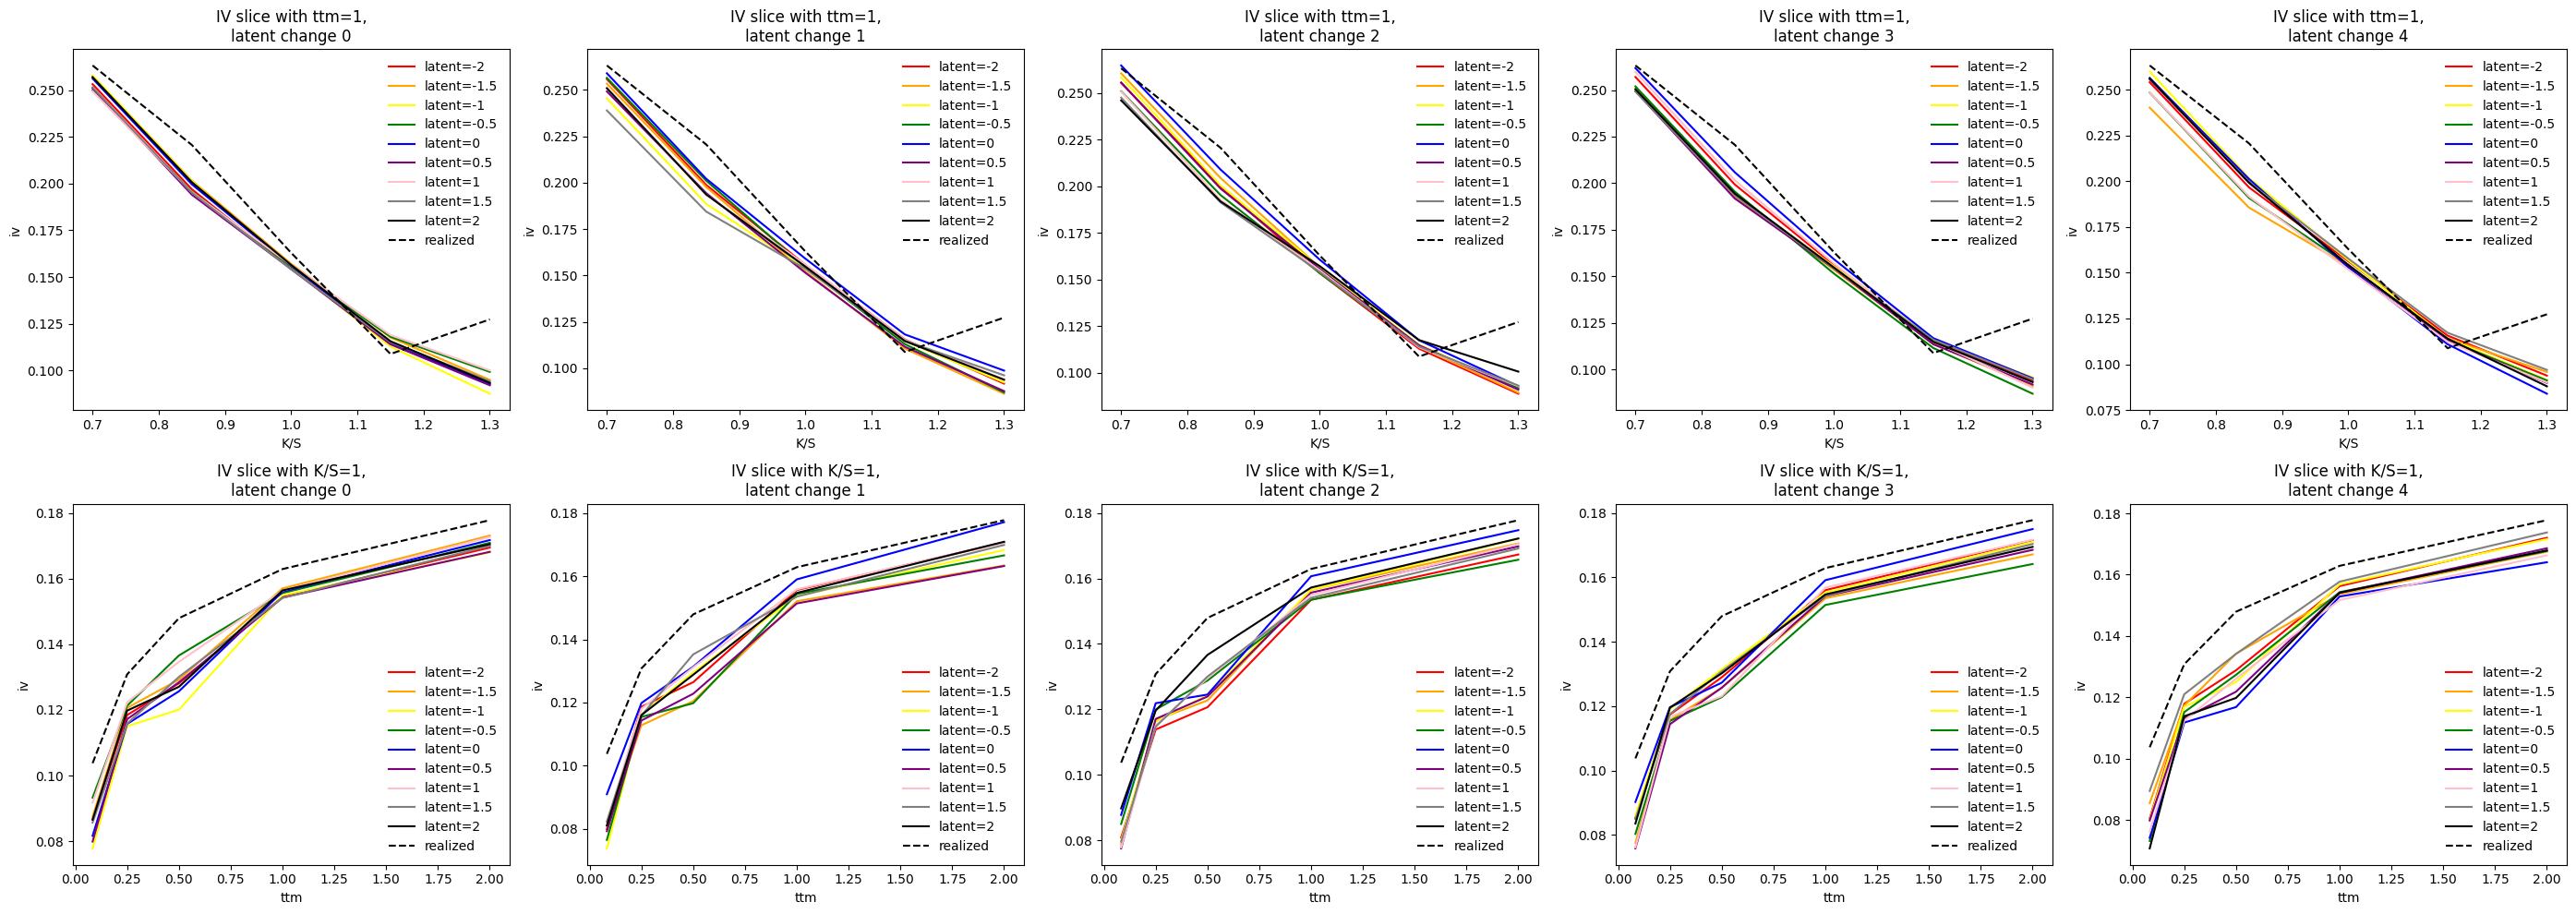

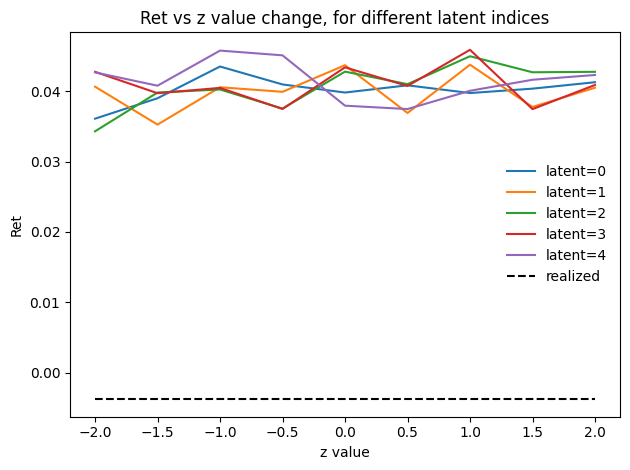

In [24]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
plot_ret_different_latents(outputs, ex_data[5001, 0], z_value_range)

In [25]:
model_data = torch.load("test_spx/ex4_lr/model_1.pt") # latent_dim=8, surface_hidden=[5,5,5], mem_hidden=100, loss on ret only
model_config = model_data["model_config"]
model = CVAEMemRand(model_config)
model.load_weights(dict_to_load=model_data)
print(model)

CVAEMemRand(
  (encoder): CVAEMemRandEncoder(
    (surface_embedding): Sequential(
      (enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_0): ReLU()
      (enc_conv_1): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_1): ReLU()
      (enc_conv_2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (enc_activation_2): ReLU()
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (ex_feats_embedding): Identity()
    (interaction): Identity()
    (mem): LSTM(129, 100, num_layers=2, batch_first=True, dropout=0.2)
    (z_mean_layer): Linear(in_features=100, out_features=8, bias=True)
    (z_log_var_layer): Linear(in_features=100, out_features=8, bias=True)
  )
  (ctx_encoder): CVAECtxMemRandEncoder(
    (ctx_surface_embedding): Sequential(
      (ctx_enc_conv_0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ctx_enc_activation_0): ReLU()
      (ctx_enc_co

Base z: tensor([[[ 1.2803, -0.4207, -1.3922, -0.6500,  0.3044, -1.0767,  1.0594,
          -0.0213],
         [ 1.0358, -0.7059, -0.0351,  1.0875,  1.6726, -0.0107,  0.0606,
           0.3410],
         [ 0.3862,  0.8331,  1.0331,  0.2298,  0.2193,  0.0122,  0.9986,
          -0.8228],
         [ 0.5334, -0.2993, -0.9264,  0.3798,  1.0954,  0.8359, -0.7440,
          -0.5948]]])


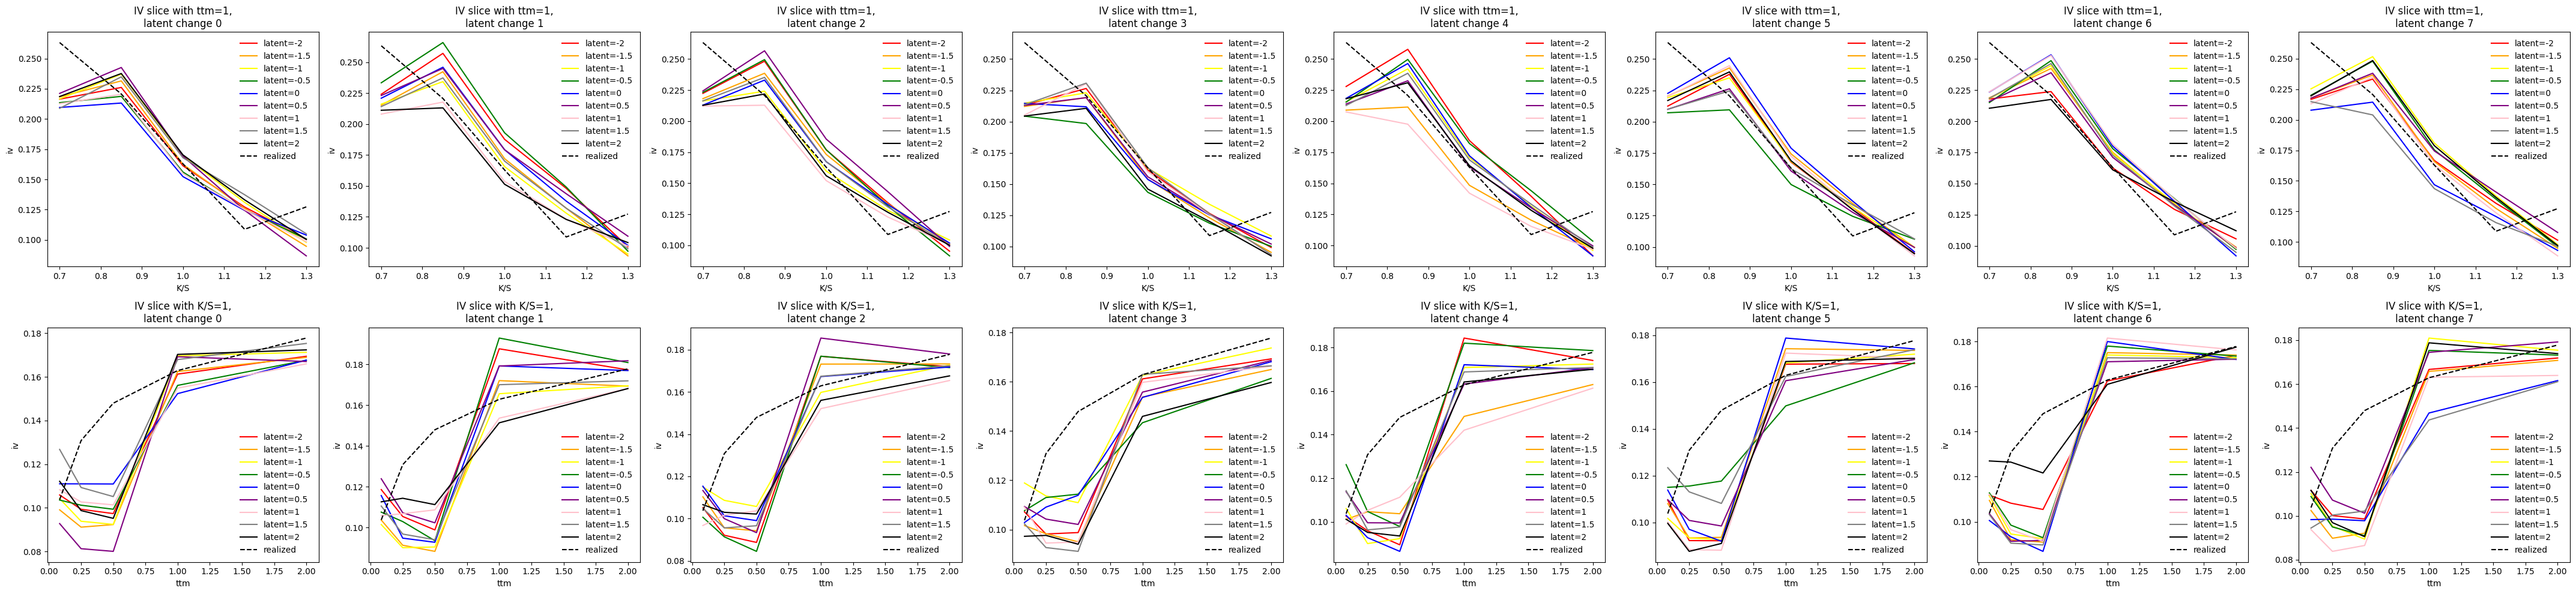

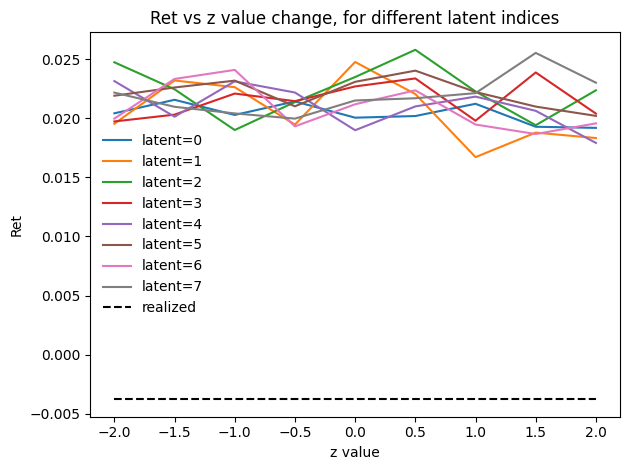

In [27]:
base_z = torch.randn((1, 4, model.config["latent_dim"]))
z_value_range = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
outputs = []
for i in range(model.config["latent_dim"]):
    outputs.append(latent_manipulation_check(model, {"surface": torch.from_numpy(vol_surf_data[4998:5001]), 
                                                     "ex_feats": torch.from_numpy(ex_data[4998:5001])},
                                             base_z, i, z_value_range))
print(f"Base z: {base_z}")
plot_surface_slice_different_latents(outputs, vol_surf_data[5001], z_value_range)
plot_ret_different_latents(outputs, ex_data[5001, 0], z_value_range)